In [490]:
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [510]:
df = pd.read_csv('datasets/images.csv')
X = df

In [511]:
X.shape

(4965, 2304)

In [492]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,14,15,10,15,14,59,9,69,151,125,...,49,59,55,61,69,53,45,40,35,12
1,4,2,13,88,113,109,125,128,139,148,...,134,131,110,94,68,44,20,24,31,26
2,194,73,53,40,35,38,44,34,26,22,...,45,17,13,17,19,15,16,19,19,17
3,206,201,205,202,195,198,205,205,211,171,...,106,104,97,108,109,111,103,93,92,81
4,221,220,216,212,210,204,197,192,198,191,...,46,49,49,43,43,59,65,65,70,68


In [507]:
# MEAN CENTERING DATA
X = X - np.mean(X,axis=0)

In [494]:
cov = np.cov(X.T)

In [495]:
eigenvalues,eigenvectors = np.linalg.eig(cov)

In [496]:
eigenvectors = eigenvectors.T
idxs = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]

In [497]:
K = 10 # First K principal components
components = eigenvectors[0:K]

In [498]:
pcs = np.dot(X, components.T)

In [499]:
pcs.shape

(4965, 10)

In [500]:
result = np.dot(X.T, pcs).T

In [501]:
result.shape

(10, 2304)

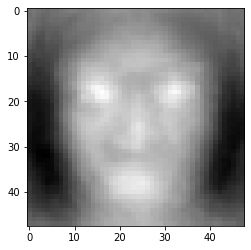

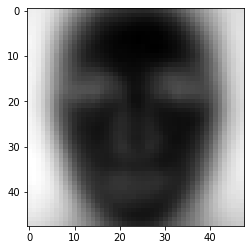

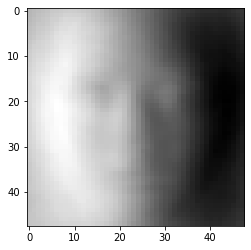

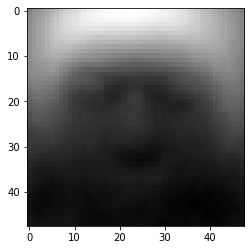

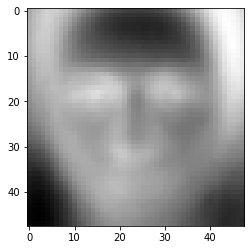

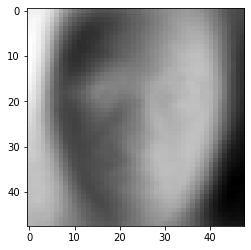

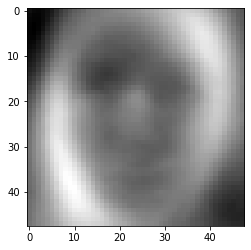

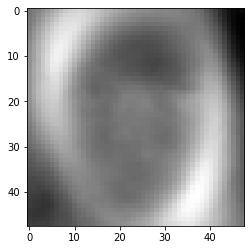

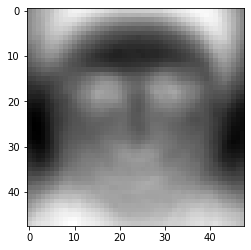

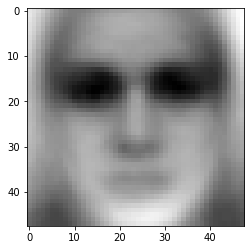

In [502]:
for x in range(K):
    image = np.reshape(result[x], (48,48))
    plt.imshow(image)
    plt.set_cmap('gray')
    plt.show()

In [503]:
exp_var = eigenvalues / sum(eigenvalues) * 100
exp_var = exp_var[0:K]
for x in exp_var:
    print('PVE for principal component ' + str(x))

PVE for principal component 28.33447489537046
PVE for principal component 11.0279012642433
PVE for principal component 9.766803183987758
PVE for principal component 6.1015074869575265
PVE for principal component 3.217828661264692
PVE for principal component 2.8607248398294898
PVE for principal component 2.095556184991672
PVE for principal component 2.0521356816013783
PVE for principal component 1.8418297879458307
PVE for principal component 1.409121956723345


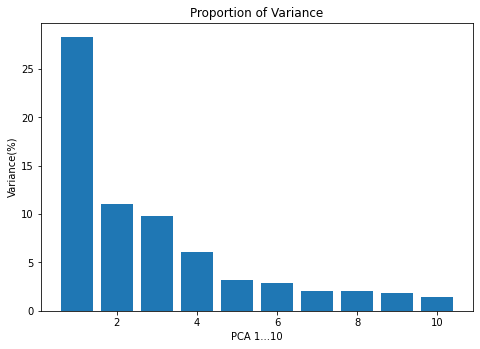

In [504]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lst = np.arange(1,K+1,1)
ax.bar(lst,exp_var[0:K])
ax.set_title('Proportion of Variance')
ax.set_xlabel('PCA 1...10')
ax.set_ylabel('Variance(%)')
plt.show()

In [506]:
exp_var.sum()

68.70788394291544

### On first 10 Principal Components, we obtain the gray-ghosty images that can be seen above, these images are used to construct human face images and reduce the effort and size necessary to recognize new faces
### PVE represents the coverage of variance as whole. 1st Principal component covers the %28 percent of whole systems variance. Added all principal components, it makes %100

### Cumulative variance goes up to %100 if we set k = 4965, but it will be costly, k=500 gives % 98 coverage 

In [480]:
k_set = [1,10,50,100,500] 
pve_set = [28.33447489537046, 68.70788394291544, 85.6932188480818, 90.84447232542036,98.06486239270211] # observed by experiment for k values {1,10,50,100,500}

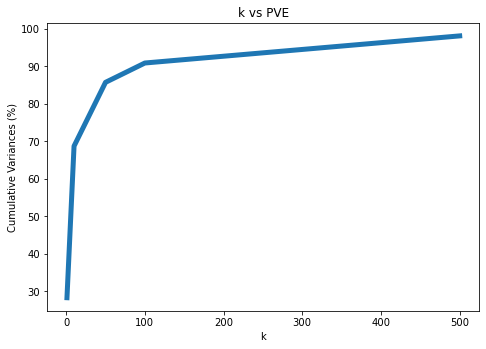

In [509]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k_set,pve_set, lw=5)
ax.set_title('k vs PVE')
ax.set_xlabel('k')
ax.set_ylabel('Cumulative Variances (%)')
plt.show()

## Eigenface Reconstruction of the 0th image in the dataset

### We compute the average face and subtract it from all faces, then compute the svd of that mean centered data x. We take the linear combination of those eigenfaces and recover  an image of person n. Every persons face is a linear combination of these eigenfaces. 

In [512]:
df = pd.read_csv('datasets/images.csv')
trainingFaces = df.to_numpy()
trainingFaces.shape

(4965, 2304)

In [513]:
avgFace = np.mean(trainingFaces,axis=0)
avgFace.shape

(2304,)

In [514]:
X = trainingFaces - avgFace
X.shape

(4965, 2304)

In [515]:
U,S,VT = np.linalg.svd(X.T,full_matrices=0)

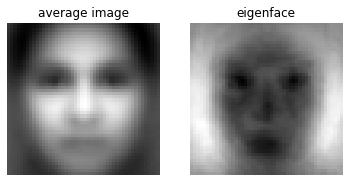

In [516]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(48,48)))
img_avg.set_cmap('gray')
plt.title('average image')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(48,48)))
img_u1.set_cmap('gray')
plt.title('eigenface')
plt.axis('off')

plt.show()

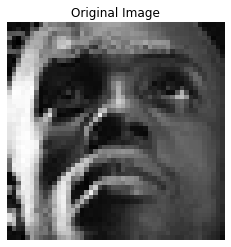

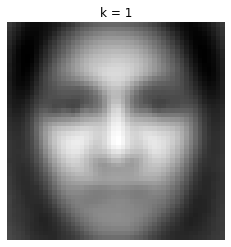

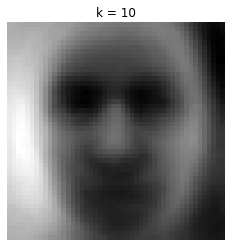

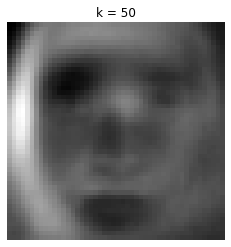

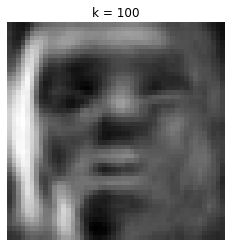

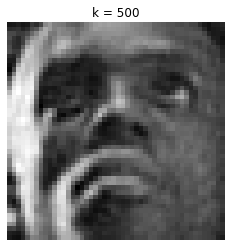

In [519]:
faces = df.to_numpy()
testFace = faces[0,:]
plt.imshow(np.reshape(testFace,(48,48)))
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

testFaceMS = testFace - avgFace
k_list = [1,10,50,100,500]

for k in k_list:
    reconFace = avgFace + U[:,:k] @ U[:,:k].T @ testFaceMS
    img = plt.imshow(np.reshape(reconFace,(48,48)))
    img.set_cmap('gray')
    plt.title('k = ' + str(k))
    plt.axis('off')
    plt.show()

### As can be seen, low k gives less precise, rough estimate of the original image. As number of principal components increase to construct the original image, it becomes clearer since the PVE coverage increase. Original image has %100 PVE coverage. After k = 100, it starts giving the sense of original image.